# **Desafio Alfabeto Alienígena**

## IESB - Pós Graduação em Inteligência Artificial

## Aprendizado não supervisionado - Prof: Paulo Cotta

#### Data de entrega: 21/10/2019

### **Nome do aluno:** Naiara Moura Pires

O IESB, juntamente com o programa aeroespacial da Agência NASTESB, estão investigando uma nave espacial que veio de outro planeta. Espalhadas dentro da nave foram encontradas várias letras.

Um grupo de cientistas do própria IESB encontrou um padrão com a linguagem muito similar à Suméria e começou a decifrar, mas todos os cientistas foram abduzidos e agora, para saber onde os cientistas foram e descobrir qual civilização os abduziu, devem terminar de decifrar as imagens das letras.

In [1]:
import tensorflow as tf; 
import numpy as np
import cv2 as cv
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
print(tf.__version__)

1.15.0-rc3


In [0]:
### Imports
from PIL import Image, ImageFilter
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Será apresentado, neste momento, o DataSet do alfabeto atual nosso:

In [4]:
caminho_alfabeto = './drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/alfabeto/';
for name in os.listdir(caminho_alfabeto):
    path = caminho_alfabeto + name
    print(path)
    image = Image.open(path)
    image.show()

./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/alfabeto/K.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/alfabeto/J.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/alfabeto/H.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/alfabeto/I.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/alfabeto/M.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/alfabeto/L.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/alfabeto/Y.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/alfabeto/8.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/alfabeto/Z.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/alfabeto/X.png
./drive/My Drive/iesb/aprendizado_nao_supervisiona

Agora será apresentado o DataSet do alfabeto baseado em Sumério, mas que não foi descoberto ainda qual é a língua exata. O mesmo foi encontrado na nave alienígena:

In [5]:
caminho_sumerio = './drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/sumerio/';
for name in os.listdir(caminho_sumerio):
    path = caminho_sumerio + name
    print(path)
    image = Image.open(path)
    image.show()

./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/sumerio/!!!!!!.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/sumerio/!!!!!!!.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/sumerio/####.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/sumerio/?????.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/sumerio/?!!.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/sumerio/?!!!!!!.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/sumerio/?.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/sumerio/##.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/sumerio/######.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/sumerio/?!!!!!!!!.png
./drive/My Drive/ies

Os pesquisadores, ao realizarem seus estudos antes de serem abdusidos, também identificaram alguns dados que nos mostram o padrão DE <==> PARA entre a nossa linguagem e a linguagem encontrada:

In [6]:
caminho_encontrado = './drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/encontrado/';
for name in os.listdir(caminho_encontrado):
    path = caminho_encontrado + name
    print(path)
    image = Image.open(path)
    image.show()

./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/encontrado/J.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/encontrado/H.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/encontrado/8.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/encontrado/N.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/encontrado/V.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/encontrado/A.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/encontrado/5.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/encontrado/F.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/encontrado/Q.png
./drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/encontrado/0.png
./drive/My Drive/iesb/aprendiz

**Primeiro exercício: **

Conforme apresentado na primeira aula de aprendizado não supervisionado, deve-se clusterizar os dados e tentar encontrar um padrão nos desenhos, utilizando a sua própria dedução.

E, de acordo com o que foi encontrado, devemos decifrar o restante do alfabeto. Para decifrar o restante do alfabeto, tenha em mente que:

Se o alfabeto contém 26 letras e os números contém de 0 a 9, sendo o 0 neutro, devemos contabilizar então que temos 9 números, agora devemos identificar as letras faltantes para identificar o texto que será apresentado na questão três. 

**Dica:**
- De A a Z e de 0 a 9, deve-se descobrir letra a letra.

É obrigatório representar a forma que foi descoberto o alfabeto alienígena por você, pesquisador, em formato de código fonte. 

Exemplo: apresentar gráfico dos clusters identificados utilizando o matplotlib e demonstrar o DE e PARA de cada letra e número do nosso alfabeto com o alfabeto alienigena.

In [8]:
# caminho_alfabeto
# caminho_sumerio
# caminho_encontrado

dataset = {'sumerio': [], 'alfabeto': []}
encontrados = {}
aI = []
jR = []
sZ = []
num = []

for name in os.listdir(caminho_alfabeto):
  dataset['alfabeto'].append(name)
dataset['alfabeto'].sort(key=lambda x: (x[0].isdigit(), x))

for name in os.listdir(caminho_sumerio):
  if name.find('?') == 0 and name.find('!') == -1:
    aI.append(name)
  elif name.find('!') == 0:
    jR.append(name)
  elif name.find('#') == 0:
    sZ.append(name)
  else:
    num.append(name)
aI.sort();
jR.sort(reverse=True);  
sZ.sort(reverse=True);  
num.sort(reverse=True);  

dataset['sumerio'] = aI + jR + sZ + num

for y in range(0, len(dataset['alfabeto'])):
  encontrados.update({re.search(r'(\w*)\.png',dataset['alfabeto'][y])[1]: dataset['sumerio'][y]})
encontrados

{'0': '#########.png',
 '1': '?!.png',
 '2': '?!!.png',
 '3': '?!!!.png',
 '4': '?!!!!.png',
 '5': '?!!!!!.png',
 '6': '?!!!!!!.png',
 '7': '?!!!!!!!.png',
 '8': '?!!!!!!!!.png',
 '9': '?!!!!!!!!!.png',
 'A': '?.png',
 'B': '??.png',
 'C': '???.png',
 'D': '????.png',
 'E': '?????.png',
 'F': '??????.png',
 'G': '???????.png',
 'H': '????????.png',
 'I': '?????????.png',
 'J': '!.png',
 'K': '!!.png',
 'L': '!!!.png',
 'M': '!!!!.png',
 'N': '!!!!!.png',
 'O': '!!!!!!.png',
 'P': '!!!!!!!.png',
 'Q': '!!!!!!!!.png',
 'R': '!!!!!!!!!.png',
 'S': '#.png',
 'T': '##.png',
 'U': '###.png',
 'V': '####.png',
 'W': '#####.png',
 'X': '######.png',
 'Y': '#######.png',
 'Z': '########.png'}

26


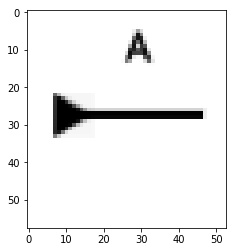

26


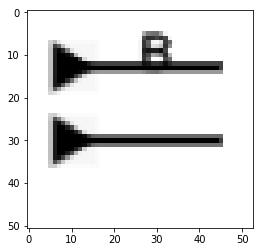

26


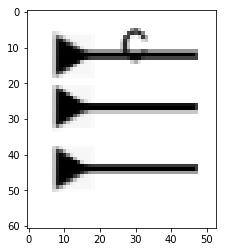

29


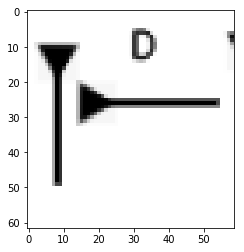

29


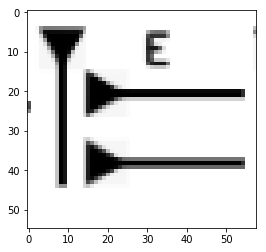

30


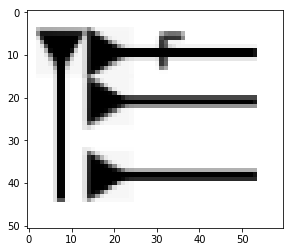

20


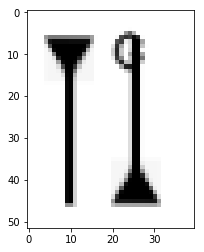

24


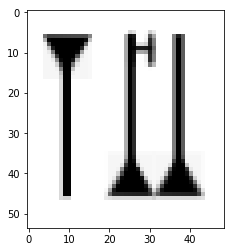

33


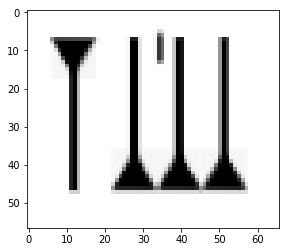

16


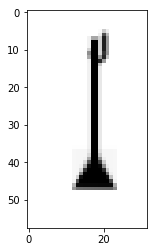

19


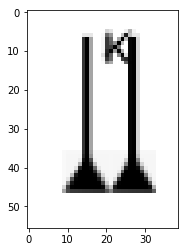

25


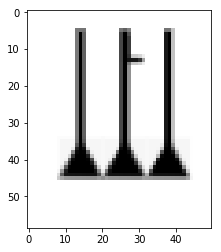

31


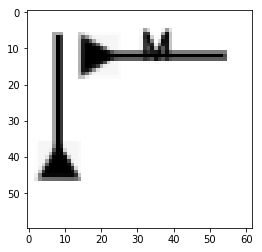

30


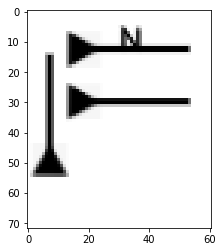

30


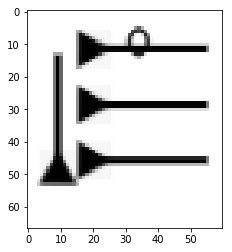

26


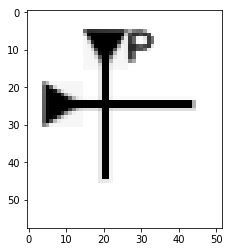

28


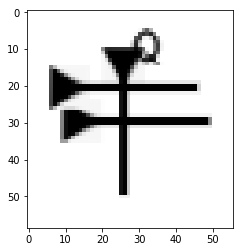

30


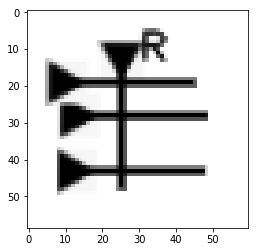

27


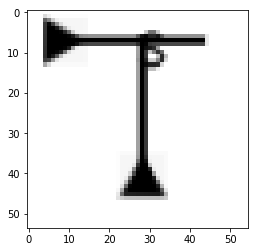

26


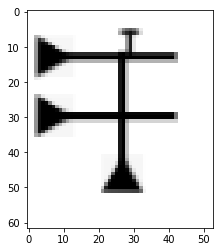

27


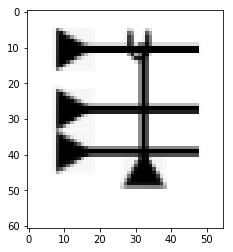

30


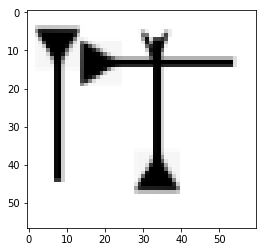

29


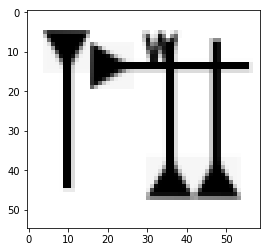

33


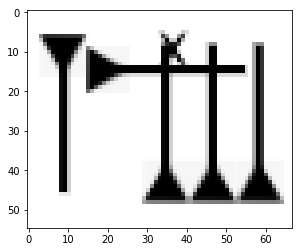

25


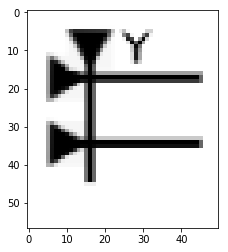

34


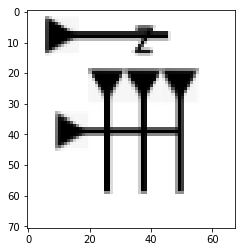

20


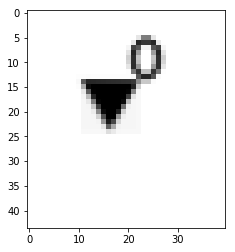

17


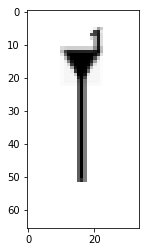

23


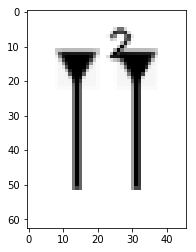

25


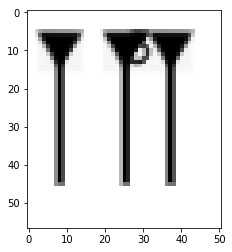

25


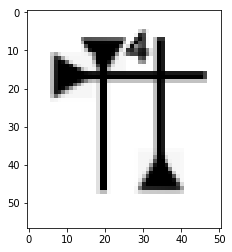

27


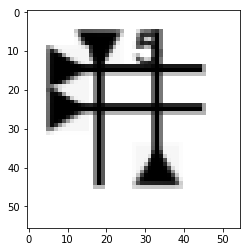

29


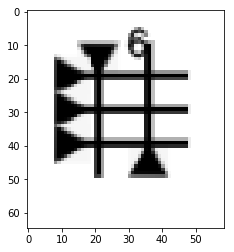

26


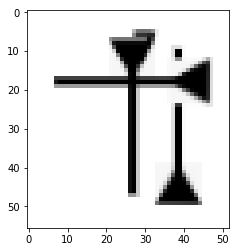

26


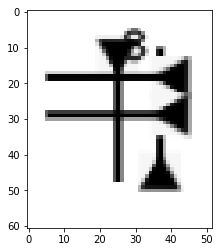

28


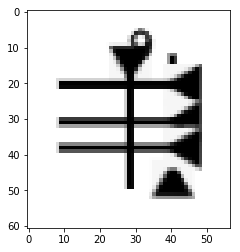

In [9]:
for key in encontrados:
  imagem = cv.imread(caminho_sumerio+encontrados[key])
  tamanho = int(imagem.shape[1]/2);
  print(tamanho)
  fonte = cv.FONT_HERSHEY_SIMPLEX
  cv.putText(imagem,key,(tamanho,13), fonte,
  0.35,(0,0,0),1,cv.LINE_AA)
  
  plt.imshow(imagem)
  plt.show()


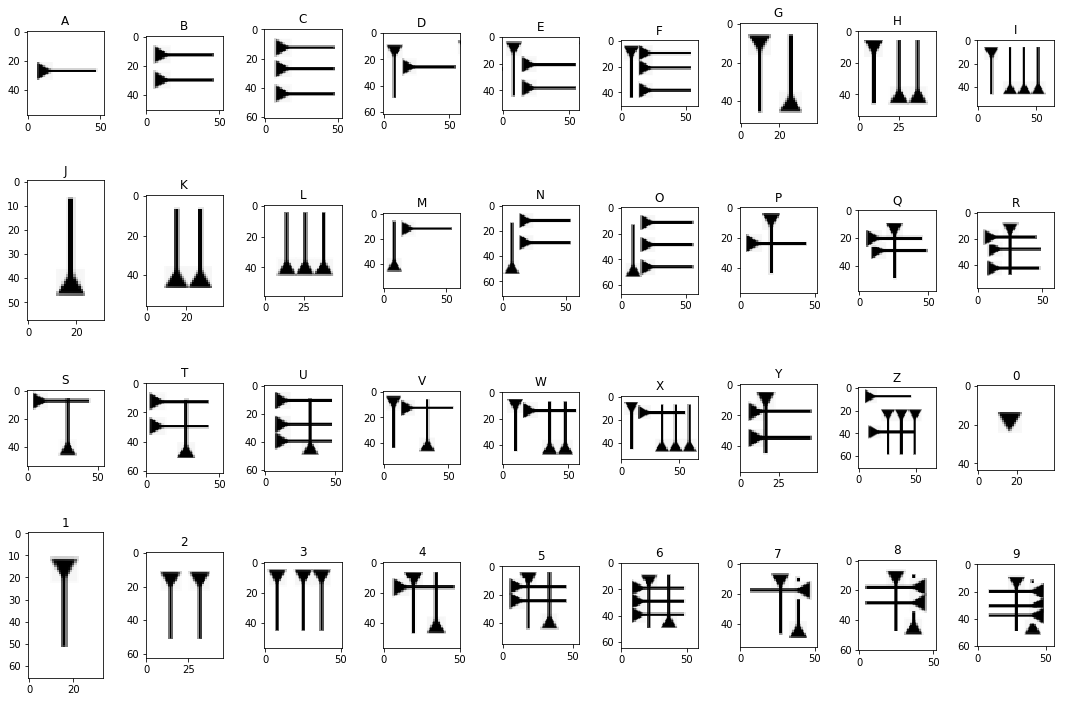

In [10]:
plt.subplots(4,9,figsize=(15,10))
plt.tight_layout()
imgLetra = []

i = 1

for key in encontrados:
  ax = plt.subplot(4,9,i);
  i += 1
  img=mpimg.imread(caminho_sumerio+encontrados[key])
  nomeImagem = key
  ax.set_title(nomeImagem)
  imgLetra.append([img, nomeImagem])
  plt.imshow(img)


In [11]:
imgLetra

[[array([[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          ...,
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],
  
         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          ...,
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],
  
         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          ...,
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],
  
         ...,
  
         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          ...,
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],
  
         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          ...,
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],
  
         [[1., 1., 1., 1.],
          [1., 1., 1

Após identificar, deve-se explicar qual foi a técnica e a lógica que foi utilizada.

**Explicar aqui**

A duas formas de verificar, a primeira eu percebi pelo nome da imagem que havia uma lógica por o nome começa com ? e muda de nove em nove menos no z que só é 8 mais o zero entao fica assim de A a I fica ? até ????????, J a S fica ! até !!!!!!!!! e de s a z e 0 fica # até ######### e por ultimo de 1 a 9 fica ?! até ?!!!!!!!!!. Outra forma é que observei que a imagem muda de 3 em 3 até a ultima.

**Segundo exercício:**

Utilize um KNN (algoritmo de vizinhos próximos) para classificar os rótulos que você criou para os clusters do exercício I. Lembrando que deve efetuar a separação de dados para testar e validar as informações. 

**Dicas:**

- Faça um Data Augumentation.
- Faça padding centralizando o conteúdo das imagens para padronizá-las para o mesmo tamanho.

In [12]:
### O código deve estar contido aqui...
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img


Using TensorFlow backend.


In [33]:
df = pd.DataFrame(data=imgLetra)
df.columns = ["imagem", "letra"]
df.head()

,imagem,letra
0,"[[[1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], ...",A
1,"[[[1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], ...",B
2,"[[[1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], ...",C
3,"[[[1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], ...",D
4,"[[[1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], ...",E


Começando data argumentation ....

In [0]:
# Diretórios para data argumetation
base_dir = './drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/'

train_dir = os.path.join(base_dir, 'train')

if not os.path.exists(train_dir):
    os.mkdir(train_dir)
    



In [35]:
augumentation = []
for index, row in df.iterrows():
  print([row['imagem'], row['letra']])
  letra = str(row['letra'])
  
  OUTPUT_PATH = str(train_dir) + '/' + letra
  
  if not os.path.exists(OUTPUT_PATH):
    os.makedirs(OUTPUT_PATH)
  
  augumentation.append([row['imagem'], row['letra']]);
  
  imgTmp = ImageDataGenerator(rotation_range=40, width_shift_range=0,
                              height_shift_range=0.2, zoom_range=0.2,
                              fill_mode='nearest', horizontal_flip=False)
  image = row['imagem']
  image = image.reshape((1,) + image.shape)
  
  i = 0
  for batch in imgTmp.flow(image, batch_size=1,
                          save_to_dir=OUTPUT_PATH, save_prefix=letra + '_', save_format='png'):
    i += 1
    augumentation.append([batch[0, :, :, :], letra])
    if i > 100:
        break 
  
  
# augumentation


[array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       ...,

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1

In [36]:
df = pd.DataFrame(data=augumentation)
df.columns = ["imagem", "letra"]
print(len(df))
print(df.head())

3672
                                              imagem letra
0  [[[1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], ...     A
1  [[[1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], ...     A
2  [[[1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], ...     A
3  [[[1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], ...     A
4  [[[1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], ...     A


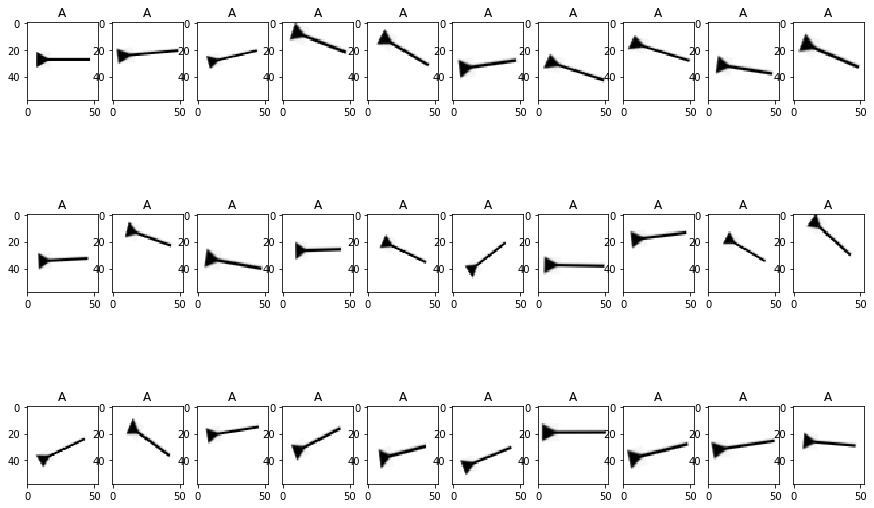

In [37]:
plt.subplots(2,10,figsize=(15,10))

i = 1

for index, row in df.iterrows():
  ax = plt.subplot(3,10,i);
  i += 1
  
  ax.set_title(row['letra'])
  plt.imshow(row['imagem'])
  if i == 31:
      break

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# del augumentation

width = int(df['imagem'][0].shape[1])
height = int(df['imagem'][0].shape[0])
dim = (width, height)

df['letra'] = df['letra'].apply(str)
target = df['letra']

# features = df['imagem']
features = []
for feat in df['imagem']:
  new_feat = cv.resize(feat, dim).flatten()
  features.append(new_feat)

del df
print(np.array(features)[0].shape)

(12296,)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size=0.20)

# 1 vizinho
knn_euclidean = KNeighborsClassifier(n_neighbors=1, p=2, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
pred = knn_euclidean.predict(X_test)

mc = confusion_matrix(y_test,pred)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        24
           1       0.81      0.87      0.84        15
           2       0.91      0.95      0.93        21
           3       0.95      0.95      0.95        20
           4       1.00      0.77      0.87        22
           5       0.96      0.92      0.94        25
           6       0.90      0.75      0.82        12
           7       0.78      0.88      0.82        16
           8       0.57      0.50      0.53        16
           9       0.72      0.59      0.65        22
           A       0.67      0.96      0.79        25
           B       0.58      0.88      0.70        17
           C       0.62      0.62      0.62        24
           D       0.65      0.77      0.70        26
           E       0.48      0.65      0.55        20
           F       0.93      0.46      0.62        28
           G       0.96      0.96      0.96        23
           H       0.84    

**Terceiro Exercício:**

No texto que será apresentado abaixo, seguindo a lógica do primeiro exercício, faça a tradução do mesmo, identificando as imagens, e apresente aqui. Após isso, deve-se transformar o conteúdo que está em imagem para texto, utilizando as labels de cada letra. Se as letras do alfabeto Alienígena não estiverem com as labels certas, deve-se corrigir e, após isso, executar todo o exercício descrito. 


**OBSERVAÇÃO**

Utilize a resposta do exercício I para chegar na resposta desta questão.

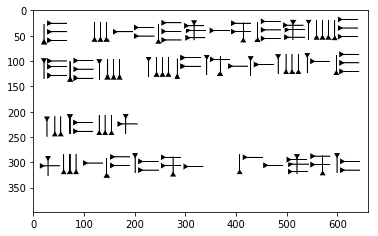

In [47]:
path = './drive/My Drive/iesb/aprendizado_nao_supervisionado/trabalho_pratico_I/dataset/mensagem.png'
img=cv.imread(path)
imgplot = plt.imshow(img)
plt.show()

In [0]:
o laboratorio foi invadido help planeta marte